### Compare the results of simulation of three predictors (NON ROBUST): 
* [FutureKnown](2021_2022_KnownFuture.ipynb)
* [Persistence](2021_2022_Persistence.ipynb)
* [Recurrent NN](2021_2022_RNN.ipynb)

#### Import Modules 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import pickle, sys, importlib,  time
import os
import joblib

In [2]:

function_folder = 'py_files/' 
# Add function folder to path if it is not already
if function_folder not in sys.path: sys.path.append(function_folder)

import oriFunctions as oriFc
from oriFunctions import network_folder, excel_folder, py_folder, Δt, attr_list

##### Import Simulations results from [FutureKnown](2021_2022_KnownFuture.ipynb),[Persistence](2021_2022_Persistence.ipynb) and [Recurrent NN](2021_2022_RNN.ipynb)

In [3]:
fut_known = joblib.load('pickle_files/simulationResults/KnownFuture.pkl')
pers = joblib.load('pickle_files/simulationResults/Persistence.pkl')
rnn = joblib.load('pickle_files/simulationResults/RNN_pred_res.pkl')

#### Concatanate Data into DF

In [4]:
vm_mu_max, vm_mu_min = 1.0250, 0.95  # Choosen 

index_toUse = rnn['P0100_concat_df'].index

p0100_df = pd.concat([fut_known['P0100_concat_df'].loc[index_toUse], 
                      pers['P0100_concat_df'].loc[index_toUse, ['Pers']],
                      rnn['P0100_concat_df'][['RNN']]], axis=1)


voltage_rise = pd.concat([fut_known['voltage_rise_df'].loc[index_toUse], 
                      pers['voltage_rise_df'].loc[index_toUse],
                      rnn['voltage_rise_df'] ], axis=1)

### Voltage Rise Plot

#### Plot created Dataframe

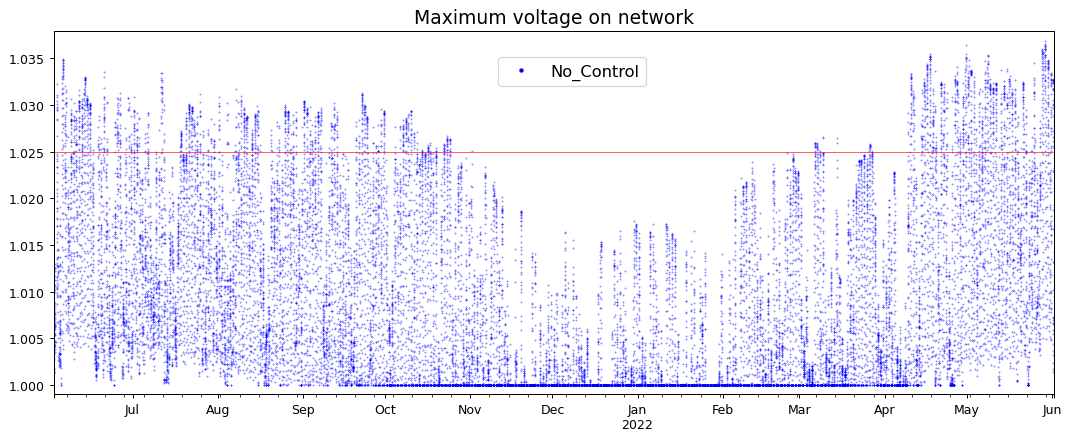

In [5]:
fig, axx = plt.subplots(figsize=(12,5), dpi=90)

voltage_rise.iloc[:,[0]].plot(style= ['b.','k.'],markersize=0.5, ax=axx, legend=False)
plt.axhline(vm_mu_max,color='r', lw=0.5,)

plt.legend( fontsize=13, markerscale=10,bbox_to_anchor=(0.6,0.95) )
plt.title("Maximum voltage on network", fontsize=15);
plt.ylim((.999,1.038))
fig.tight_layout()
# fig.legend(['', 'dfdf'], )

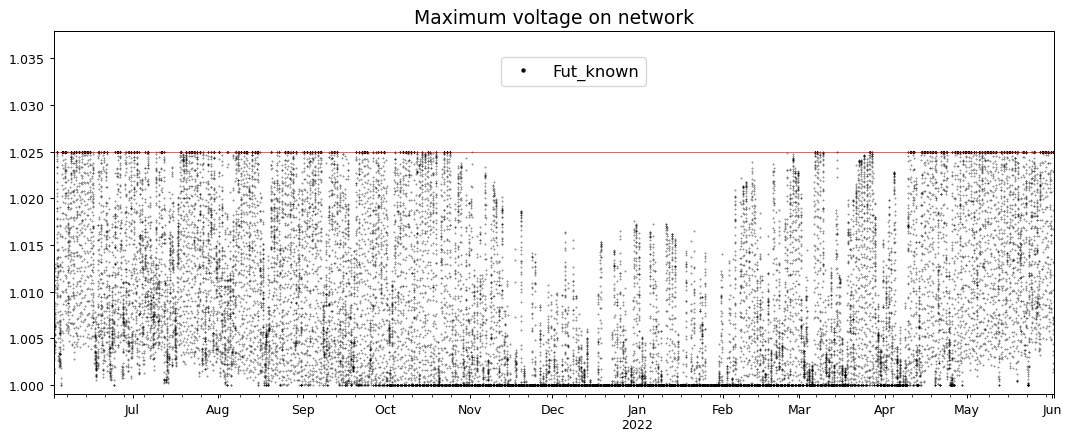

In [6]:
fig, axx = plt.subplots(figsize=(12,5), dpi=90)

voltage_rise.iloc[:,[1]].plot(style= ['k.'],markersize=0.5, ax=axx, legend=False)
plt.axhline(vm_mu_max,color='r', lw=0.5,)

plt.legend( fontsize=13, markerscale=10,bbox_to_anchor=(0.6,0.95) )
plt.title("Maximum voltage on network", fontsize=15);
plt.ylim((.999,1.038))
fig.tight_layout()
# fig.legend(['', 'dfdf'], )

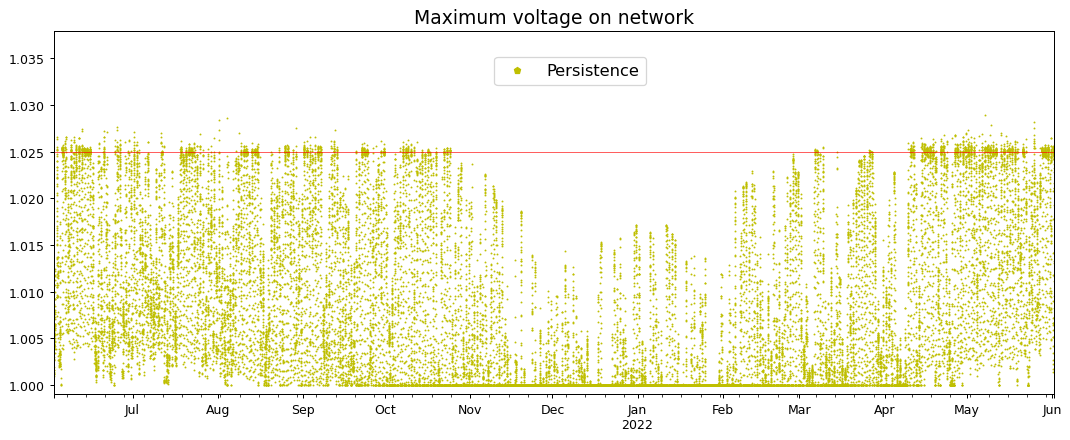

In [7]:
fig, axx = plt.subplots(figsize=(12,5), dpi=90)

voltage_rise.iloc[:,[2]].plot(style= ['yp' ],markersize=0.5, ax=axx, legend=False)
plt.axhline(vm_mu_max,color='r', lw=0.5,)

plt.legend(['Persistence'], fontsize=13, markerscale=10,bbox_to_anchor=(0.6,0.95) )
plt.title("Maximum voltage on network", fontsize=15);
plt.ylim((.999,1.038))
fig.tight_layout()
# fig.legend(['', 'dfdf'], )

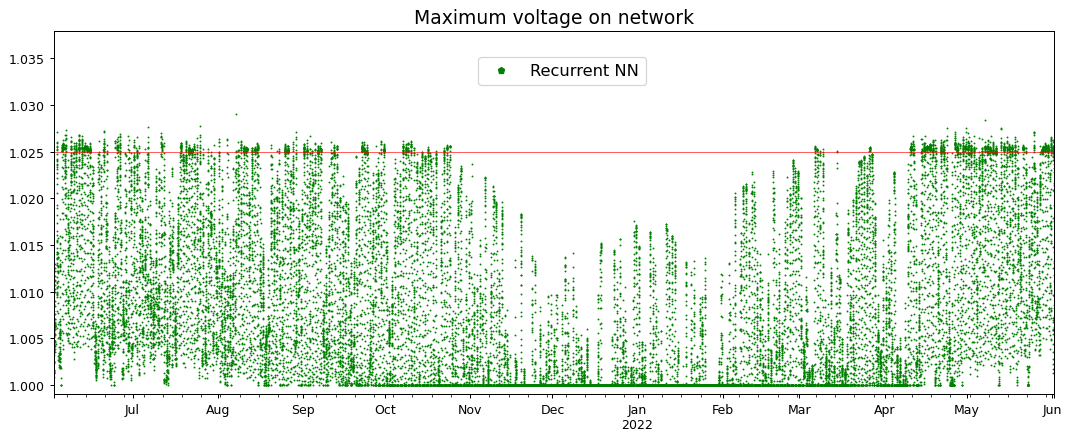

In [8]:
fig, axx = plt.subplots(figsize=(12,5), dpi=90)

voltage_rise.iloc[:,[3]].plot(style= ['gp' ],markersize=0.5, ax=axx, legend=False)
plt.axhline(vm_mu_max,color='r', lw=0.5,)

plt.legend(['Recurrent NN'], fontsize=13, markerscale=10,bbox_to_anchor=(0.6,0.95) )
plt.title("Maximum voltage on network", fontsize=15);
plt.ylim((.999,1.038))
fig.tight_layout()
# fig.legend(['', 'dfdf'], )

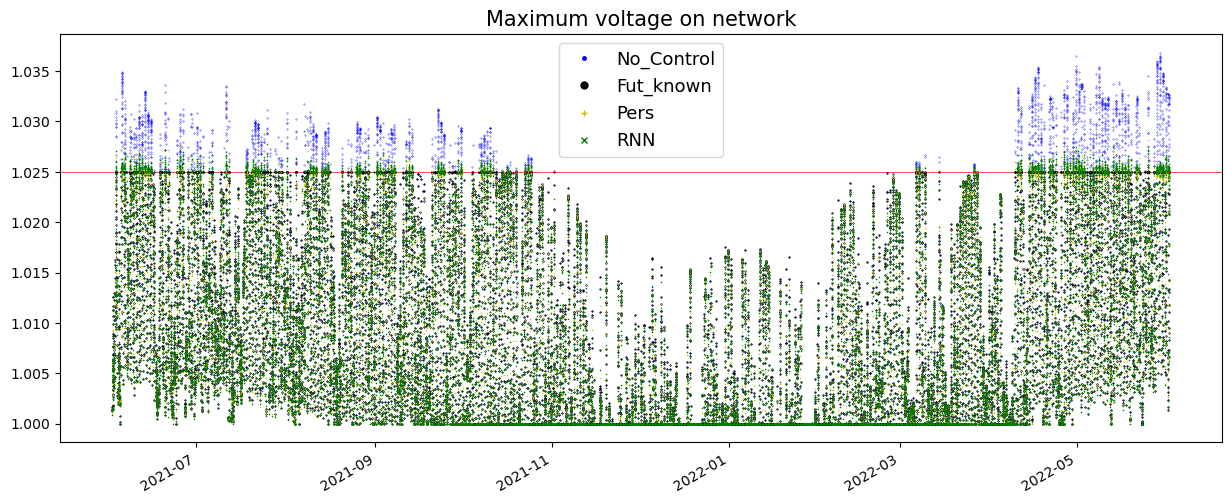

In [9]:
fig, axx = plt.subplots(figsize=(15,6), dpi=100)
plt.axhline(vm_mu_max,color='r', lw=0.5)

voltage_rise.plot(style= ['b.','ko','y+','gx'],markersize=0.5, ax=axx)
plt.legend( fontsize=13, markerscale=10)
plt.title("Maximum voltage on network", fontsize=15);

### Voltage Rise above define threshold Plot

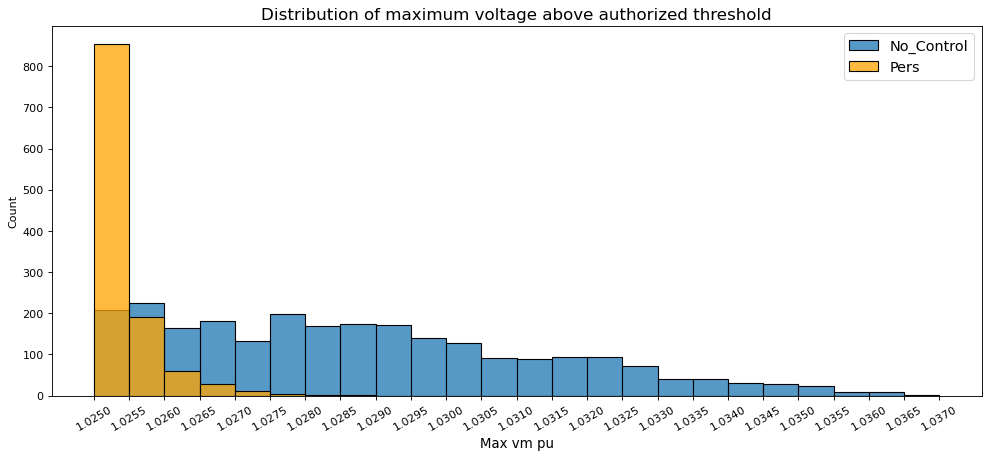

In [10]:
# Concatanate distribution data for the 
disdata = voltage_rise[voltage_rise>vm_mu_max]

x_max_lim = 1.0370
n_bins = len(np.arange(vm_mu_max, x_max_lim, 5e-4))-1
fig, axx = plt.subplots(figsize=(15,6), dpi=80)
sbn.histplot(data = disdata, x=disdata.columns[0], ax=axx, bins=n_bins, binrange=(vm_mu_max,x_max_lim), color='tab:blue',)
sbn.histplot(data = disdata, x=disdata.columns[2], ax=axx, bins=n_bins, binrange=(vm_mu_max, x_max_lim), color='orange',)

axx.set_xticks(np.arange(vm_mu_max, x_max_lim, 5e-4), labels=[f'{elm:.4f}' for elm in np.arange(vm_mu_max, x_max_lim, 5e-4)], rotation=30);
axx.set_xlabel('Max vm pu', size=12)
plt.legend(disdata.columns[[0,2]], fontsize=13)
plt.title('Distribution of maximum voltage above authorized threshold', fontsize=15);

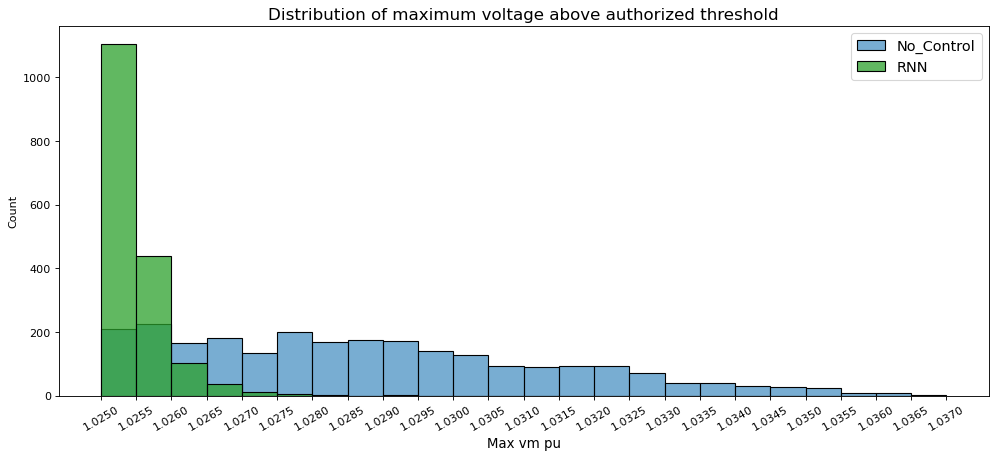

In [11]:
# Concatanate distribution data for the 
disdata = voltage_rise[voltage_rise>vm_mu_max]

x_max_lim = 1.0370
n_bins = len(np.arange(vm_mu_max, x_max_lim, 5e-4))-1
fig, axx = plt.subplots(figsize=(15,6), dpi=80)
sbn.histplot(data = disdata, x=disdata.columns[0], ax=axx, bins=n_bins, binrange=(vm_mu_max,x_max_lim), color='tab:blue', alpha=0.6)
sbn.histplot(data = disdata, x=disdata.columns[3], ax=axx, bins=n_bins, binrange=(vm_mu_max, x_max_lim), color='tab:green',)

axx.set_xticks(np.arange(vm_mu_max, x_max_lim, 5e-4), labels=[f'{elm:.4f}' for elm in np.arange(vm_mu_max, x_max_lim, 5e-4)], rotation=30);
axx.set_xlabel('Max vm pu', size=12)
plt.legend(disdata.columns[[0,3]], fontsize=13)
plt.title('Distribution of maximum voltage above authorized threshold', fontsize=15);

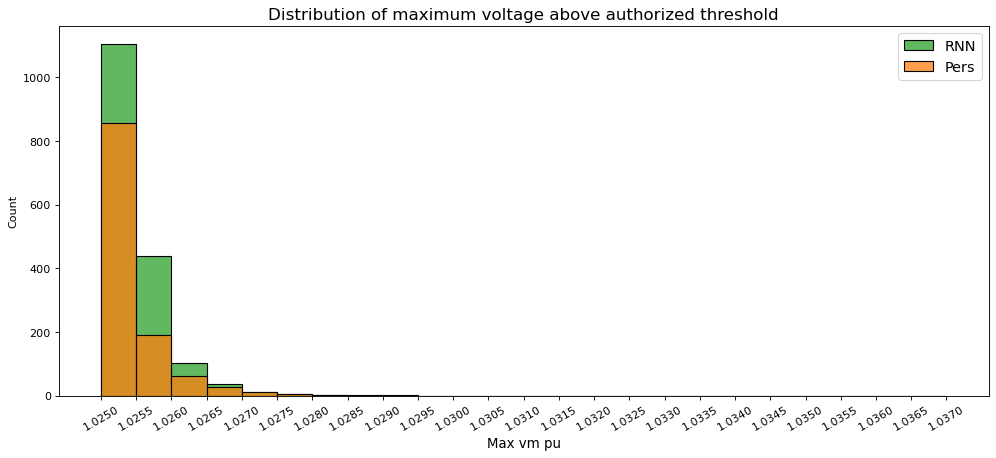

In [12]:
# Concatanate distribution data for the 
disdata = voltage_rise[voltage_rise>vm_mu_max]

x_max_lim = 1.0370
n_bins = len(np.arange(vm_mu_max, x_max_lim, 5e-4))-1
fig, axx = plt.subplots(figsize=(15,6), dpi=80)
sbn.histplot(data = disdata, x=disdata.columns[3], ax=axx, bins=n_bins, binrange=(vm_mu_max, x_max_lim), color='tab:green',)
sbn.histplot(data = disdata, x=disdata.columns[2], ax=axx, bins=n_bins, binrange=(vm_mu_max,x_max_lim), color='tab:orange',)


axx.set_xticks(np.arange(vm_mu_max, x_max_lim, 5e-4), labels=[f'{elm:.4f}' for elm in np.arange(vm_mu_max, x_max_lim, 5e-4)], rotation=30);
axx.set_xlabel('Max vm pu', size=12)
plt.legend(disdata.columns[[3,2]], fontsize=13)
plt.title('Distribution of maximum voltage above authorized threshold', fontsize=15);

Text(0.5, 1.0, 'Multivariate Histogram of voltage rise above the authorised threshold')

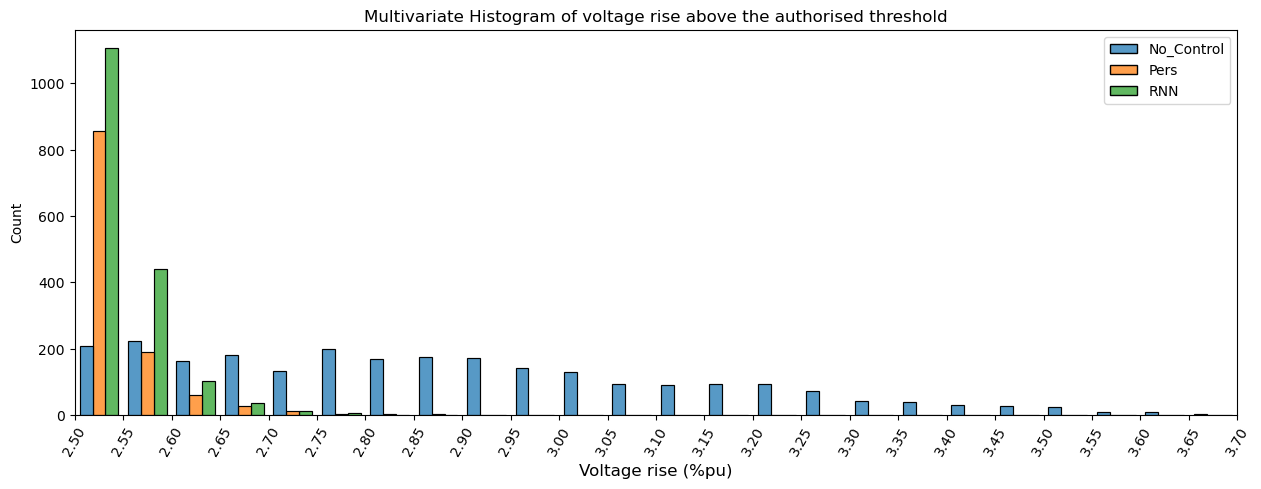

In [13]:
fig, axx = plt.subplots(figsize=(15,5), dpi=100)

nb_points = 25
laabel = [f'{elm:.2f}' for elm in np.linspace(2.50, 3.7, nb_points)]
tiicks = np.linspace(vm_mu_max, x_max_lim, nb_points)

sbn.histplot(disdata.iloc[:, [0,2,3]], ax=axx, 
             bins=(nb_points-1), 
             binrange=(vm_mu_max ,x_max_lim),
             stat='count', multiple='dodge', shrink = 0.8, )

axx.set_xticks(tiicks, labels=laabel, rotation=60);
plt.xlabel('Voltage rise (%pu)',fontsize=12);
axx.set(xlim=(vm_mu_max,x_max_lim))
# fig.legend(handleheight=0.5)
# axx.semilogy()
plt.title('Multivariate Histogram of voltage rise above the authorised threshold')

### Energy and Power

<AxesSubplot:>

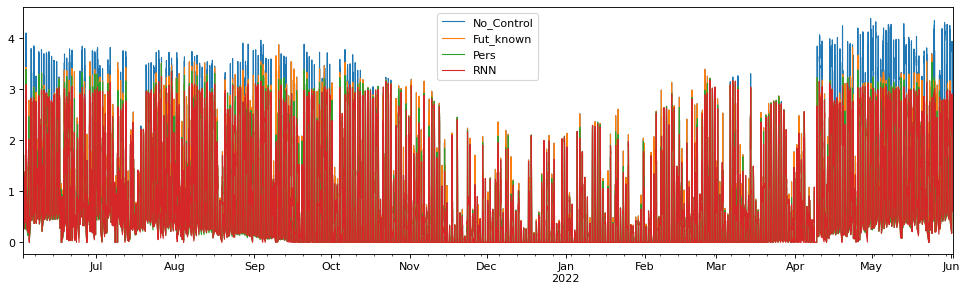

In [14]:
fig, axx = plt.subplots(figsize=(15,4), dpi=80)

p0100_df.plot(lw=1, ax=axx)

In [16]:
p0100_df

,No_Control,Fut_known,Pers,RNN
2021-06-02 07:00,0.333,0.333,0.223,0.194658
2021-06-02 07:10,0.274,0.274,0.274,0.274000
2021-06-02 07:20,0.254,0.254,0.254,0.254000
2021-06-02 07:30,0.271,0.271,0.254,0.267684
2021-06-02 07:40,0.309,0.309,0.271,0.309000
...,...,...,...,...
2022-06-01 18:10,1.010,1.010,1.010,1.010000
2022-06-01 18:20,0.959,0.959,0.959,0.878071
2022-06-01 18:30,0.833,0.833,0.833,0.833000
2022-06-01 18:40,0.672,0.672,0.672,0.672000


In [15]:
# Compute Energy
var_no_control, var_fut_known, var_persis, var_rnn = p0100_df.sum()*Δt

print(f'P0100 prod,   No Control  : {var_no_control:.2f} MWh')
print(f'P0100 prod, Future known  : {var_fut_known:.2f} MWh |  Perc = {var_fut_known*100/var_no_control:.2f}%')
print(f'P0100 prod, Persistence   : {var_persis:.2f} MWh |  Perc = {var_persis*100/var_no_control:.2f}%')
print(f'P0100 prod, Recurrent NN  : {var_rnn:.2f} MWh |  Perc = {var_rnn*100/var_no_control:.2f}%')


P0100 prod,   No Control  : 5198.97 MWh
P0100 prod, Future known  : 4843.12 MWh |  Perc = 93.16%
P0100 prod, Persistence   : 4470.39 MWh |  Perc = 85.99%
P0100 prod, Recurrent NN  : 4567.47 MWh |  Perc = 87.85%


In [17]:
p0100_max

NameError: name 'p0100_max' is not defined

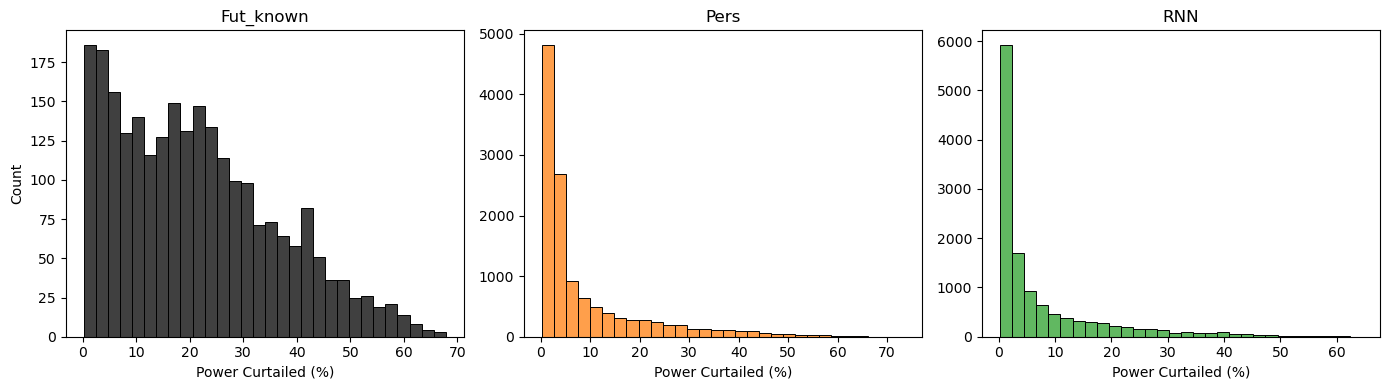

In [17]:
p0100_max = 4 # Maximum power of P0100
col_list = ['black', 'tab:orange', 'tab:green']

fig, axx = plt.subplots(1,3, figsize=(14,4),)

for ind, cur_ax in enumerate(axx.flatten()):
    
    var = (p0100_df.No_Control-p0100_df.iloc[:,ind+1])*100/p0100_max
    sbn.histplot(var[var>0.25].values, ax=cur_ax, color=col_list[ind], bins=30)
    if ind != 0 :
        cur_ax.set(ylabel='')
    cur_ax.set(xlabel='Power Curtailed (%)', title=p0100_df.columns[ind+1])

fig.tight_layout()

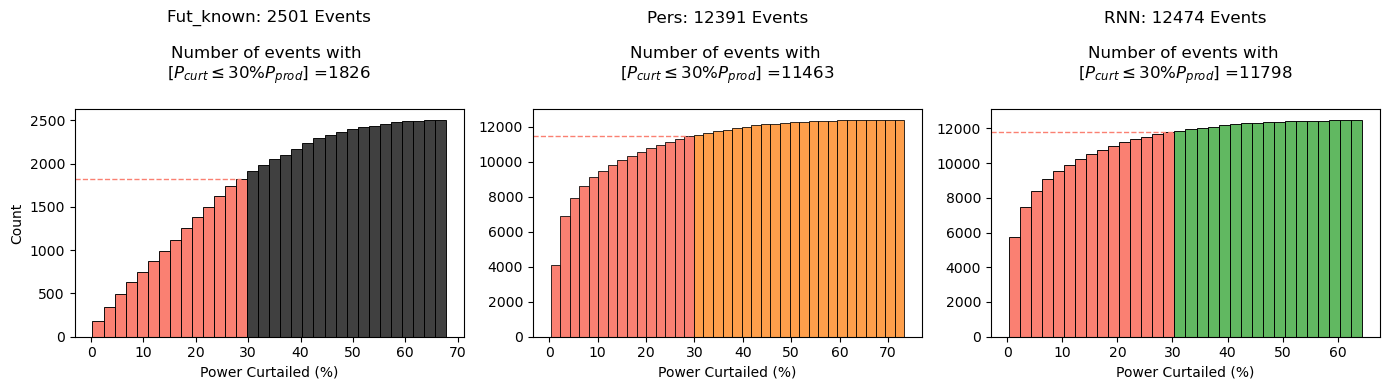

In [18]:
tot_bins = [32, 37, 32]
lenn = [65, 70, 60 ]
col_list = ['black', 'tab:orange', 'tab:green']

fig, axx = plt.subplots(1,3, figsize=(14,4),)

for ind, cur_ax in enumerate(axx.flatten()):
    
    var = (p0100_df.No_Control-p0100_df.iloc[:,ind+1])*100/p0100_max
    sbn.histplot(var[var>0.25].values, ax=cur_ax, color=col_list[ind], cumulative=True, bins=tot_bins[ind])
    if ind != 0 :
        cur_ax.set(ylabel='')
        perc = 15
        for elm in cur_ax.patches[:perc]: elm.set_facecolor('salmon')
        var1 = cur_ax.patches[perc-1].get_height()
        var2 = cur_ax.patches[-1].get_height()
        x_maxx = cur_ax.patches[perc-1].get_x()/lenn[ind]
        cur_ax.axhline(cur_ax.patches[perc-1].get_height(),xmax=x_maxx, color='salmon', ls='--', lw=1)
        cur_ax.set(xlabel='Power Curtailed (%)', title=p0100_df.columns[ind+1]+f': {var2} Events\n\nNumber of events with \n[$P_{{curt}}\leq ${30}%$P_{{prod}}$] ={var1} \n')
    else: 
        perc=14
        for elm in cur_ax.patches[:perc]: elm.set_facecolor('salmon')
        var1 = cur_ax.patches[perc-1].get_height()
        var2 = cur_ax.patches[-1].get_height()
        x_maxx = cur_ax.patches[perc-1].get_x()/lenn[ind]
        cur_ax.axhline(cur_ax.patches[perc-1].get_height(),xmax=x_maxx, color='salmon', ls='--', lw=1)
        cur_ax.set(xlabel='Power Curtailed (%)', title=p0100_df.columns[ind+1]+f': {var2} Events\n\nNumber of events with \n[$P_{{curt}}\leq ${30}%$P_{{prod}}$] ={var1} \n')
    
    
    # var2 = axx[1].patches[-1].get_height() - var1 
    
fig.tight_layout()